## **Eduardo Carrasco Vidal** <img src="img/logo.png" align="right" style="width: 120px;"/>

**Doctorado en Ingeniería de Sistemas Complejos, Universidad Adolfo Ibáñez.**

**Profesor:** Gonzalo Ruz Heredia.
__Ayudante:__ Carlos Sepúlveda Morales.

**Curso:** Machine Learning (Aprendizaje Automático).

Enlace al repositorio del alumno en [GitHub](https://github.com/educarrascov/DISC_MachineLearning) _@educarrascov_

![Python](https://img.shields.io/badge/python-%2314354C.svg) 

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea3_Contreras_Almada.ipynb
* Subir el archivo al link de entrega Trabajo en webcursos que será habilitado
* __Fecha de entrega:__ viernes 7 de octubre, 23:55 hrs.

# Tarea Nº 3: Machine Learning.

### 1. Exploratory Data Analysis (EDA):

Considere el dataset CallCenterData de la [publicación](https://www.sciencedirect.com/science/article/abs/pii/S0957417412004605) vista en clase.

In [1]:
# se efectúa la carga de la base de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
from matplotlib.pyplot import figure
df = pd.read_csv('data/CallCenterData.csv', sep=',')

In [2]:
df.shape #Se verifica el shape para determinar cantidad total de datos

(660, 11)

In [3]:
df.info() #verificar cantidad de columnas/filas, tipos de variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          660 non-null    int64  
 1   Edad                        660 non-null    int64  
 2   Sexo                        660 non-null    object 
 3   NivelEducacion              660 non-null    object 
 4   EstadoCivil                 660 non-null    object 
 5   NivelSocEco                 660 non-null    object 
 6   HorasLogeadas               660 non-null    float64
 7   HorasHabladas               660 non-null    float64
 8   ContactosEfectivosPromedio  660 non-null    float64
 9   RegistrosTerminados         660 non-null    float64
 10  ProdMayorUbral              660 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 56.8+ KB


Como se observa, el detalle de las variables es el siguiente:
1. **Numéricas:** `ID`, `Edad`, `HorasLogeadas`, `HorasHabladas`, `ContactosEfectivosPromedio`, `RegistrosTerminados`.
2. **Categóricas:** `Sexo`, `NivelEducacion`, `EstadoCivil`, `NivelSocEco`, `ProdMayorUbral`.

Todas tienen la misma cantidad de datos (660), sin presentar ninguno nulo.

In [4]:
df.head() #verificar detalle de 6 primeras mfilas de cada columna

,ID,Edad,Sexo,NivelEducacion,EstadoCivil,NivelSocEco,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,ProdMayorUbral
0,1,32,m,un,s,c3c4,151.1525,45.8525,192.25,591.75,si
1,2,24,m,em,s,c3c4,71.1800,24.7600,1.00,501.00,no
2,3,29,m,em,c,c3c4,120.5600,49.4500,156.00,993.00,si
3,4,48,f,em,c,e,90.8500,28.8500,442.00,569.00,no
4,5,25,m,un,s,c3c4,190.1800,41.1600,0.00,0.00,si


#### 1.1. Variables categóricas:

In [5]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Existen {} Variables Categóricas\n'.format(len(categorical)))
print('Las variables categoricas son :\n\n', categorical)

Existen 5 Variables Categóricas

Las variables categoricas son :

 ['Sexo', 'NivelEducacion', 'EstadoCivil', 'NivelSocEco', 'ProdMayorUbral']


In [6]:
## Se verifica que no existan registros nulos.
df[categorical].isnull().sum()

Sexo              0
NivelEducacion    0
EstadoCivil       0
NivelSocEco       0
ProdMayorUbral    0
dtype: int64

In [7]:
# Se verifica la cardinalidad, objeto determinar cuantas etiquetas posee cada variable
for var in categorical:  
    print(var, ' contiene ', len(df[var].unique()), ' etiquetas')

Sexo  contiene  2  etiquetas
NivelEducacion  contiene  4  etiquetas
EstadoCivil  contiene  2  etiquetas
NivelSocEco  contiene  5  etiquetas
ProdMayorUbral  contiene  2  etiquetas


#### 1.2. Variables Numéricas:

In [8]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Existen {} Variables Numéricas\n'.format(len(numerical)))
print('Las variables numéricas son :', numerical)

Existen 6 Variables Numéricas

Las variables numéricas son : ['ID', 'Edad', 'HorasLogeadas', 'HorasHabladas', 'ContactosEfectivosPromedio', 'RegistrosTerminados']


In [9]:
## Se verifica que no existan registros nulos.
df[numerical].isnull().sum()

ID                            0
Edad                          0
HorasLogeadas                 0
HorasHabladas                 0
ContactosEfectivosPromedio    0
RegistrosTerminados           0
dtype: int64

Identificadas las variables, se deben crear el conjunto de datos dependientes e independientes, en eset caso, la variable de salida es `ProdMayorUbral` y además, se decide eliminar la variable `ID` porque sólo representa la identificación del agente (ejecutivo) que tiene el registro, no siendo utilizado en la resolución del problema.

In [10]:
X = df.drop(['ProdMayorUbral','ID'], axis=1)

In [11]:
X.shape

(660, 9)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        660 non-null    int64  
 1   Sexo                        660 non-null    object 
 2   NivelEducacion              660 non-null    object 
 3   EstadoCivil                 660 non-null    object 
 4   NivelSocEco                 660 non-null    object 
 5   HorasLogeadas               660 non-null    float64
 6   HorasHabladas               660 non-null    float64
 7   ContactosEfectivosPromedio  660 non-null    float64
 8   RegistrosTerminados         660 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 46.5+ KB


Como se observa, el detalle posterior al EDA en las variables independientes (X) es: 

1. **Numéricas:** `Edad`, `HorasLogeadas`, `HorasHabladas`, `ContactosEfectivosPromedio`, `RegistrosTerminados`.
2. **Categóricas:** `Sexo`, `NivelEducacion`, `EstadoCivil`, `NivelSocEco`.

#### 1.3. Feature Engineering:
Conversión de atributos categóricos a númericos.

In [13]:
def get_ohe(X):
    temp_df = pd.DataFrame(data=ohe.transform(X[['Sexo','NivelEducacion','EstadoCivil','NivelSocEco']]), columns=ohe.get_feature_names_out())
    X.drop(columns=['Sexo','NivelEducacion','EstadoCivil','NivelSocEco'], axis=1, inplace=True)
    X = pd.concat([X.reset_index(drop=True), temp_df], axis=1)
    return X

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype='int')
ohe.fit(X[['Sexo','NivelEducacion','EstadoCivil','NivelSocEco']]) #seleccionamos las variables categóricas
X = get_ohe(X)

In [15]:
X.shape

(660, 18)

In [16]:
X.head(5)

,Edad,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,Sexo_f,Sexo_m,NivelEducacion_em,NivelEducacion_sec,NivelEducacion_ts,NivelEducacion_un,EstadoCivil_c,EstadoCivil_s,NivelSocEco_abc1,NivelSocEco_c2,NivelSocEco_c3c4,NivelSocEco_e,NivelSocEco_fue
0,32,151.1525,45.8525,192.25,591.75,0,1,0,0,0,1,0,1,0,0,1,0,0
1,24,71.1800,24.7600,1.00,501.00,0,1,1,0,0,0,0,1,0,0,1,0,0
2,29,120.5600,49.4500,156.00,993.00,0,1,1,0,0,0,1,0,0,0,1,0,0
3,48,90.8500,28.8500,442.00,569.00,1,0,1,0,0,0,1,0,0,0,0,1,0
4,25,190.1800,41.1600,0.00,0.00,0,1,0,0,0,1,0,1,0,0,1,0,0


In [17]:
X.info() #Se verifica el estado de todas las variables, identificando el tipo de variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        660 non-null    int64  
 1   HorasLogeadas               660 non-null    float64
 2   HorasHabladas               660 non-null    float64
 3   ContactosEfectivosPromedio  660 non-null    float64
 4   RegistrosTerminados         660 non-null    float64
 5   Sexo_f                      660 non-null    int64  
 6   Sexo_m                      660 non-null    int64  
 7   NivelEducacion_em           660 non-null    int64  
 8   NivelEducacion_sec          660 non-null    int64  
 9   NivelEducacion_ts           660 non-null    int64  
 10  NivelEducacion_un           660 non-null    int64  
 11  EstadoCivil_c               660 non-null    int64  
 12  EstadoCivil_s               660 non-null    int64  
 13  NivelSocEco_abc1            660 non

#### 1.4 Variable objetivo:
Codifique la variable de salida ProdMayorUbral, utilice: etiqueta __si__ codificada como 1, y etiqueta __no__ como 0.

In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['ProdMayorUbral'] = lb.fit_transform(df['ProdMayorUbral'])
y = df['ProdMayorUbral']

In [19]:
y.head(5) #se verifica el detalle de la variable output.

0    1
1    0
2    1
3    0
4    1
Name: ProdMayorUbral, dtype: int64

#### 1.5. Data Split:
Genere una partición 70% para entrenamiento y el 30% restante para prueba

In [20]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 218)

In [21]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((462, 18), (198, 18))

In [22]:
X_train

,Edad,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,Sexo_f,Sexo_m,NivelEducacion_em,NivelEducacion_sec,NivelEducacion_ts,NivelEducacion_un,EstadoCivil_c,EstadoCivil_s,NivelSocEco_abc1,NivelSocEco_c2,NivelSocEco_c3c4,NivelSocEco_e,NivelSocEco_fue
563,36,14.496286,2.922143,30.142857,48.428571,0,1,1,0,0,0,1,0,0,0,1,0,0
102,28,64.100000,12.475000,74.000000,139.500000,1,0,0,0,0,1,0,1,0,0,1,0,0
158,27,38.000000,10.400000,0.000000,0.000000,1,0,1,0,0,0,0,1,0,0,1,0,0
55,21,58.830000,21.440000,150.000000,522.000000,1,0,1,0,0,0,0,1,0,1,0,0,0
85,22,58.000000,13.870000,55.000000,421.000000,0,1,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,29,66.275000,10.080000,61.500000,142.500000,1,0,1,0,0,0,0,1,0,0,1,0,0
440,37,120.836667,52.815000,269.500000,542.500000,0,1,1,0,0,0,0,1,0,0,1,0,0
398,41,185.323000,45.380000,334.700000,645.500000,1,0,1,0,0,0,0,1,0,0,1,0,0
358,23,157.459500,32.657750,100.500000,184.250000,1,0,1,0,0,0,0,1,0,0,1,0,0


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 563 to 589
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        462 non-null    int64  
 1   HorasLogeadas               462 non-null    float64
 2   HorasHabladas               462 non-null    float64
 3   ContactosEfectivosPromedio  462 non-null    float64
 4   RegistrosTerminados         462 non-null    float64
 5   Sexo_f                      462 non-null    int64  
 6   Sexo_m                      462 non-null    int64  
 7   NivelEducacion_em           462 non-null    int64  
 8   NivelEducacion_sec          462 non-null    int64  
 9   NivelEducacion_ts           462 non-null    int64  
 10  NivelEducacion_un           462 non-null    int64  
 11  EstadoCivil_c               462 non-null    int64  
 12  EstadoCivil_s               462 non-null    int64  
 13  NivelSocEco_abc1            462 n

#### 1.6. Feature Scaling:
Antes de efectuar predicciones con el modelo, se debe mapear todas las variables en la misma escala.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [25]:
X_train = pd.DataFrame(X_train)

In [26]:
X_test = pd.DataFrame(X_test)

In [27]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.386364,0.055479,0.023335,0.024789,0.025620,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.204545,0.247570,0.102324,0.060855,0.073800,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.181818,0.146497,0.085166,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.045455,0.227162,0.176451,0.123355,0.276154,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.068182,0.223948,0.113858,0.045230,0.222722,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [28]:
col_names = X.columns
X_train.columns = X.columns

In [29]:
X_train.head() #verificar la asignación de nombres para cada columna

,Edad,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,Sexo_f,Sexo_m,NivelEducacion_em,NivelEducacion_sec,NivelEducacion_ts,NivelEducacion_un,EstadoCivil_c,EstadoCivil_s,NivelSocEco_abc1,NivelSocEco_c2,NivelSocEco_c3c4,NivelSocEco_e,NivelSocEco_fue
0,0.386364,0.055479,0.023335,0.024789,0.025620,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.204545,0.247570,0.102324,0.060855,0.073800,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.181818,0.146497,0.085166,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.045455,0.227162,0.176451,0.123355,0.276154,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.068182,0.223948,0.113858,0.045230,0.222722,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        462 non-null    float64
 1   HorasLogeadas               462 non-null    float64
 2   HorasHabladas               462 non-null    float64
 3   ContactosEfectivosPromedio  462 non-null    float64
 4   RegistrosTerminados         462 non-null    float64
 5   Sexo_f                      462 non-null    float64
 6   Sexo_m                      462 non-null    float64
 7   NivelEducacion_em           462 non-null    float64
 8   NivelEducacion_sec          462 non-null    float64
 9   NivelEducacion_ts           462 non-null    float64
 10  NivelEducacion_un           462 non-null    float64
 11  EstadoCivil_c               462 non-null    float64
 12  EstadoCivil_s               462 non-null    float64
 13  NivelSocEco_abc1            462 non

## Pregunta 1
Entrene un clasificador naive Bayes usando sólo los atributos socio-demográficos. Luego evalúe en el conjunto de prueba generando el classification report.

### Respuesta:

Objeto efectuar lo requerido, se debe identificar en el conjunto de datos, aquellos que son socio-demográficos (14), los cuales corresponden a:

- `Edad`
- `Sexo_f`
- `Sexo_m` 
- `NivelEducacion_em`  
- `NivelEducacion_sec` 
- `NivelEducacion_ts` 
- `NivelEducacion_un` 
- `EstadoCivil_c`  
- `EstadoCivil_s`  
- `NivelSocEco_abc1` 
- `NivelSocEco_c2`
- `NivelSocEco_c3c4`
- `NivelSocEco_e`
- `NivelSocEco_fue`



In [31]:
X_train1 = X_train.iloc[:,[0,5,6,7,8,9,10,11,12,13,14,15,16,17]].copy()
X_test1 = X_test.iloc[:,[0,5,6,7,8,9,10,11,12,13,14,15,16,17]].copy()

In [32]:
X_train1

,Edad,Sexo_f,Sexo_m,NivelEducacion_em,NivelEducacion_sec,NivelEducacion_ts,NivelEducacion_un,EstadoCivil_c,EstadoCivil_s,NivelSocEco_abc1,NivelSocEco_c2,NivelSocEco_c3c4,NivelSocEco_e,NivelSocEco_fue
0,0.386364,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.204545,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.181818,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.045455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.068182,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,0.227273,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
458,0.409091,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
459,0.500000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
460,0.090909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Para la resolución de esta pregunta, la variable `Edad` es una variable continua pero se asume que posee una distribución normal.

In [33]:
from sklearn.naive_bayes import GaussianNB
model_sociodem = GaussianNB()
score = []
model_sociodem.fit(X_train1,y_train)

GaussianNB()

In [34]:
from sklearn.metrics import accuracy_score,r2_score as r2
from sklearn.metrics import classification_report, plot_confusion_matrix

predicciones_sociodem = model_sociodem.predict(X_test1)
accuracy_sociodem = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_sociodem,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas para el NB de Variables Socio Demográficas es: {round(100 * accuracy_sociodem,2)} %")
score.append(round(100 * accuracy_sociodem,2))

El porcentaje de clasificaciones correctas para el NB de Variables Socio Demográficas es: 55.56 %


/Users/educarrasco/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [35]:
print(classification_report(y_test, predicciones_sociodem))

              precision    recall  f1-score   support

           0       0.55      0.82      0.66       104
           1       0.57      0.27      0.36        94

    accuracy                           0.56       198
   macro avg       0.56      0.54      0.51       198
weighted avg       0.56      0.56      0.52       198



Como se observa, los valores obtenidos son de bajo desempeño, especialmente los que refieren a Recall.

In [36]:
from sklearn.metrics import confusion_matrix
cf_matrix_1 = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones_sociodem)
print(cf_matrix_1)

[[85 19]
 [69 25]]


<AxesSubplot:>

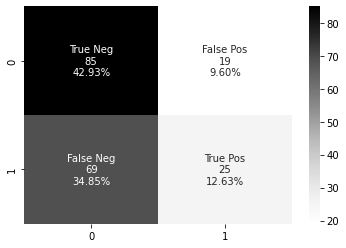

In [37]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_1.flatten()/np.sum(cf_matrix_1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_1, annot=labels, fmt='', cmap='Greys')

De acuerdo al resultado obtenido en la matriz de confusión, donde se observan: **True Negative** = 85 (42.93%), **False Negative** = 69 (34.85%),   **True Positive** = 25 (12.63%) y **False Positive** = 19 (9.60%), se pueden determinar las siguientes métricas:

| Métrica         | Descripción                              |
|-----------------|------------------------------------------|
| `Accuracy`     | (**ACC** - Classification Accuracy Rate)  |
| `Sensitivity (Recall)`  | (**TPR** - True Positive Rate)   |
| `Specificity` | (**TNR** - True Negative Rate)             |

En base a los resultados obtenidos, el desempeño del clasificador con las variables ingresadas (socio-dem.) tiene una alta tasa de clasificaciones **False Negative**, lo cual influye negativamente en el modelo; observando el resto de los parámetros, no hay ninguno que represente un alto poder predictivo.

Lo anterior representa que los aspectos sociodemográficos no permiten predecir el comportamiento del ejecutivo referidos a cumplir: **si** o **no**, un determinado margen de producción. Esto se observa al identificar la gran cantidad de False (tanto negativos como positivos).

## Pregunta 2
Lo mismo que la pregunta anterior pero usando sólo los atributos operacionales. Mejora el desempeño? argumente en función de las métricas de desempeño.

### Respuesta:

Objeto efectuar lo requerido, se debe identificar en el conjunto de datos, aquellos que son operacionales (4), los cuales corresponden a:

- `HorasLogeadas`.
- `HorasHabladas`.
- `ContactosEfectivosPromedio`.
- `RegistrosTerminados`.

In [38]:
X_train2 = X_train.iloc[:,[1,2,3,4]].copy()
X_test2 = X_test.iloc[:,[1,2,3,4]].copy()

In [39]:
X_train2

,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados
0,0.055479,0.023335,0.024789,0.025620
1,0.247570,0.102324,0.060855,0.073800
2,0.146497,0.085166,0.000000,0.000000
3,0.227162,0.176451,0.123355,0.276154
4,0.223948,0.113858,0.045230,0.222722
...,...,...,...,...
457,0.255993,0.082520,0.050576,0.075387
458,0.467284,0.435878,0.221628,0.286999
459,0.717008,0.374401,0.275247,0.341489
460,0.609106,0.269206,0.082648,0.097474


### 2.1. Test de Normalidad
Para el análisis de los varoles operacionales, se verificará su normalidad mediante Métodos Gráficos.

In [40]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [41]:
logeadas = X_train2['HorasLogeadas']
habladas = X_train2['HorasHabladas']
contactos = X_train2['ContactosEfectivosPromedio']
registros = X_train2['RegistrosTerminados']

#### 2.1.1. Normalidad de Horas Logeadas:

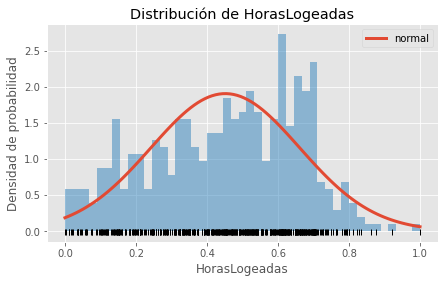

In [42]:
mu, sigma = stats.norm.fit(logeadas)
x_hat = np.linspace(min(logeadas), max(logeadas), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=3, label='normal')
ax.hist(x=logeadas, density=True, bins=45, color="#3182bd", alpha=0.5)
ax.plot(logeadas, np.full_like(logeadas, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de HorasLogeadas')
ax.set_xlabel('HorasLogeadas')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

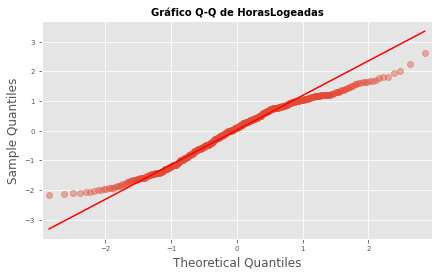

In [43]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    logeadas,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de HorasLogeadas', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Mediante ambos métodos gráficos, se puede observar que los datos de `HorasLogeadas` tienen tendencia a una distribución normal.

#### 2.1.2. Normalidad de Horas Habladas:

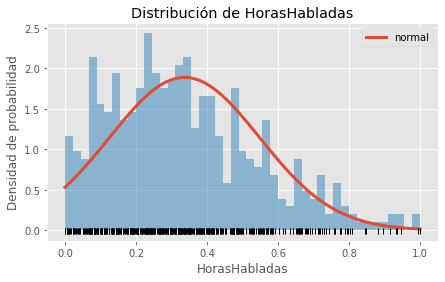

In [44]:
mu, sigma = stats.norm.fit(habladas)
x_hat = np.linspace(min(habladas), max(habladas), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=3, label='normal')
ax.hist(x=habladas, density=True, bins=45, color="#3182bd", alpha=0.5)
ax.plot(habladas, np.full_like(habladas, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de HorasHabladas')
ax.set_xlabel('HorasHabladas')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

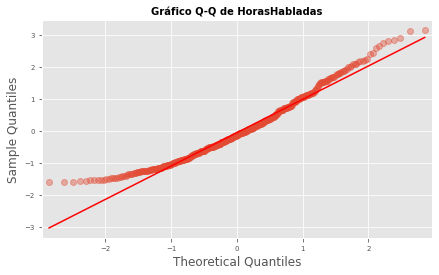

In [45]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    habladas,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de HorasHabladas', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Mediante ambos métodos gráficos, se puede observar que los datos de `HorasHabladas` tienen tendencia a una distribución normal, a pesar de que su gráfico muestra una ligera asimetría positiva.

#### 2.1.3. Normalidad de Contactos Efectivos Promedio:

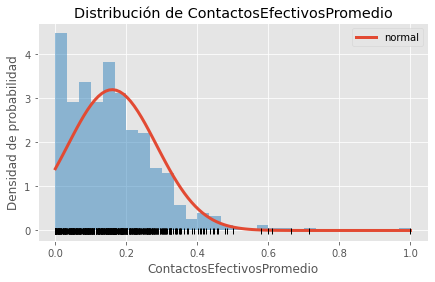

In [46]:
mu, sigma = stats.norm.fit(contactos)
x_hat = np.linspace(min(contactos), max(contactos), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=3, label='normal')
ax.hist(x=contactos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(contactos, np.full_like(contactos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de ContactosEfectivosPromedio')
ax.set_xlabel('ContactosEfectivosPromedio')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

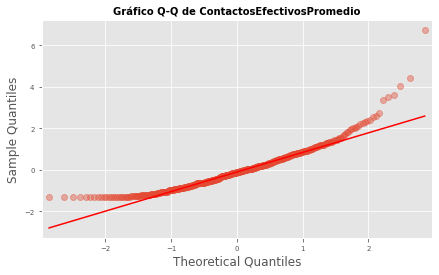

In [47]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    contactos,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de ContactosEfectivosPromedio', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Mediante ambos métodos gráficos, se puede observar que los datos de `ContactosEfectivosPromedio` tienen tendencia a una distribución normal, a pesar de que su gráfico muestra una marcada asimetría positiva, el gráfico Q-Q se puede observar la tendencia dem la distribución de datos con la distribución de comparación, por lo cual, se puede señalar que siguen una distribución normal.

#### 2.1.4. Normalidad de Registros Terminados:

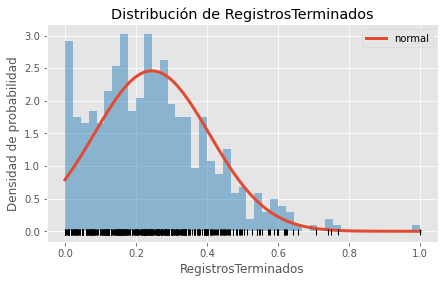

In [48]:
mu, sigma = stats.norm.fit(registros)
x_hat = np.linspace(min(registros), max(registros), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=3, label='normal')
ax.hist(x=registros, density=True, bins=45, color="#3182bd", alpha=0.5)
ax.plot(registros, np.full_like(registros, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de RegistrosTerminados')
ax.set_xlabel('RegistrosTerminados')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

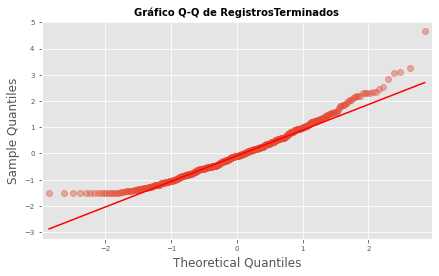

In [49]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    registros,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de RegistrosTerminados', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Al igual que el anterior, se puede observar que los datos de `Registros Terminados` tienen tendencia a una distribución normal, a pesar de que su gráfico muestra una asimetría positiva, el gráfico Q-Q se puede observar la tendencia dem la distribución de datos con la distribución de comparación, por lo cual, se puede señalar que siguen una distribución normal.

A partir de lo expuesto, se puede señalar que **las variables operacionales tienen una distribución normal**.

In [50]:
from sklearn.naive_bayes import GaussianNB
model_operacionales = GaussianNB()
score = []
model_operacionales.fit(X_train2,y_train)

GaussianNB()

In [51]:
predicciones_operacionales = model_operacionales.predict(X_test2)
accuracy_operacionales = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_operacionales,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas para el NB de Variables Operacionales es: {round(100 * accuracy_operacionales,2)} %")
score.append(round(100 * accuracy_operacionales,2))

El porcentaje de clasificaciones correctas para el NB de Variables Operacionales es: 77.78 %


Al utilizar sólo las variables operacionales, aumenta el porcentaje de clasificaciones correctas significativamente, pasando de un 55.56% a un 77.78%, esto preliminarmente permite señalar que las variables operacionales tienen mayor nivel de significancia en la determinación de la variable output.

In [52]:
print(classification_report(y_test, predicciones_operacionales))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       104
           1       0.75      0.81      0.78        94

    accuracy                           0.78       198
   macro avg       0.78      0.78      0.78       198
weighted avg       0.78      0.78      0.78       198



En relación con el Classification Report, se puede observar que la tasa recall aumenta de manera importante, lo cual nos permite diferenciar cuales son realmente los agentes que bajo ciertos parámetros podemos identificar positivamente.
En este caso con un 81% de acuertos, podemos identificar un agente que potencialmente **si** se encuentre por sobre el umbral de producción, en contraste con lo obtenido en el resultado de variables socio-demográficas donde este valor era cercano al 36%.

In [53]:
from sklearn.metrics import confusion_matrix
cf_matrix_2 = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones_operacionales)
print(cf_matrix_2)

[[78 26]
 [18 76]]


<AxesSubplot:>

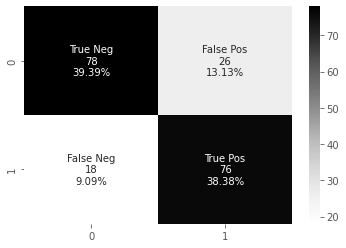

In [54]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_2.flatten()/np.sum(cf_matrix_2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_2, annot=labels, fmt='', cmap='Greys')

Por último, del análisis de la matriz de confusión, se puede señalar que la cantidad de falsos negativos (18 - 9.09%) y falsos positivos (26 - 13.13%), disminuye considerablemente, por lo cual, se puede concluir que las variables operacionales en gran medida permiten efectuar la predicción de que un agente se encuentre por sobre/bajo el umbral de producción.

## Pregunta 3
Lo mismo que antes pero ahora considerando todos los atributos. Mejora el desempeño? Valdrá la pena usar todos los atributos realmente? argumente en función de las métricas de desempeño.



### Respuesta

In [55]:
from sklearn.naive_bayes import GaussianNB
model_NB = GaussianNB()
score = []
model_NB.fit(X_train,y_train)

GaussianNB()

In [56]:
predicciones_NB = model_NB.predict(X_test)
accuracy_NB = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_NB,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas para el NB de todas las variables es: {round(100 * accuracy_NB,2)} %")
score.append(round(100 * accuracy_NB,2))

El porcentaje de clasificaciones correctas para el NB de todas las variables es: 74.24 %


De acuerdo al resultado obtenido al utilizar todas las variables, existe una leve disminución del porcentaje de clasificaciones correctas al utilizar variables socio-demográficas como operacinales, pasando de un 78% a un 74%.

In [57]:
print(classification_report(y_test, predicciones_NB))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       104
           1       0.73      0.72      0.73        94

    accuracy                           0.74       198
   macro avg       0.74      0.74      0.74       198
weighted avg       0.74      0.74      0.74       198



Con respecto al análisis del Classification Report, se puede observar una disminución del recall, lo que se ve afectado por la inclusión de las variables socio-demográficas.

In [58]:
from sklearn.metrics import confusion_matrix
cf_matrix_3 = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones_NB)
print(cf_matrix_3)

[[79 25]
 [26 68]]


<AxesSubplot:>

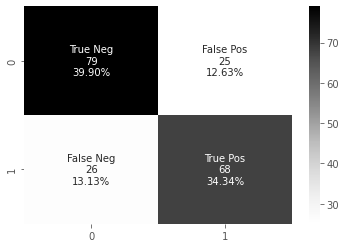

In [59]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_3.flatten()/np.sum(cf_matrix_3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_3, annot=labels, fmt='', cmap='Greys')

Por último, el análisis de la matriz de confusión señala que los valores obtenidos tanto de **False Negative (26 - 13.13%)** como de **False Positive (25 - 13.63%)**, representan un aumento a causa del uso de las variables socio-demográficas.



## Pregunta 4
Qué ocurre si entrena un árbol de decisión usando todos los atributos. Luego evalúe en el conjunto de prueba generando el classification report. Mejora el desempeño? argumente en función de las métricas de desempeño.
Qué atributos aparecen en el árbol resultante? 

### Respuesta

In [60]:
X_train.head()

,Edad,HorasLogeadas,HorasHabladas,ContactosEfectivosPromedio,RegistrosTerminados,Sexo_f,Sexo_m,NivelEducacion_em,NivelEducacion_sec,NivelEducacion_ts,NivelEducacion_un,EstadoCivil_c,EstadoCivil_s,NivelSocEco_abc1,NivelSocEco_c2,NivelSocEco_c3c4,NivelSocEco_e,NivelSocEco_fue
0,0.386364,0.055479,0.023335,0.024789,0.025620,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.204545,0.247570,0.102324,0.060855,0.073800,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.181818,0.146497,0.085166,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.045455,0.227162,0.176451,0.123355,0.276154,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.068182,0.223948,0.113858,0.045230,0.222722,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Se genera una segunda partición de datos, de manera de efectuar una determinación de optimalidad en relación a la profundidad del árbolm de decisión.

In [61]:
#segunda partición
X_train_dtc, X_val, y_train_dtc, y_val = train_test_split(
    X_train,y_train,
    test_size=0.2, random_state=0)

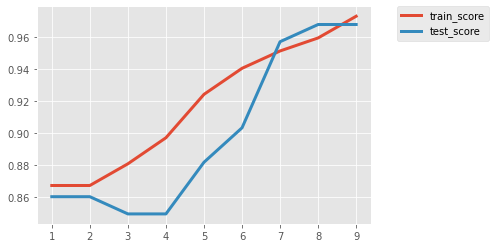

In [62]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_score = []
test_score = []

for depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=218, max_depth=depth).fit(X_train, y_train)
    train_score.append(tree.score(X_train_dtc, y_train_dtc))
    test_score.append(tree.score(X_val, y_val))
plt.plot(range(1,10), train_score, label="train_score", linewidth=3)
plt.plot(range(1,10), test_score, label="test_score", linewidth=3)
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', borderaxespad=0.);

Como se observa en la figura, la profundidad adecuada es de 2, con esta técnica de pre-pruning evitamos que el arbol de sobreajuste, a pesar de que aumentó el sesgo.

Con una profundidad 2, permite observar de manera **gráfica las variables más incidentes en el problema**.

In [63]:
# Creación del modelo
modelo_dtc = DecisionTreeClassifier(
            max_depth         = 2, #de acuerdo a lo obtenido anteriormente
            criterion         = 'gini',
            random_state      = 218
          )
modelo_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=218)

In [64]:
from sklearn.metrics import accuracy_score
predicciones = modelo_dtc.predict(X_test)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El Accuracy (porcentaje de clasificaciones correctas) es: {100 * round(accuracy,2)} %")

El Accuracy (porcentaje de clasificaciones correctas) es: 77.0 %


In [73]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       104
           1       0.78      0.73      0.75        94

    accuracy                           0.77       198
   macro avg       0.77      0.77      0.77       198
weighted avg       0.77      0.77      0.77       198



In [77]:
from sklearn.metrics import confusion_matrix
cf_matrix_dtc = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones)
print(cf_matrix_dtc)

[[84 20]
 [25 69]]


<AxesSubplot:>

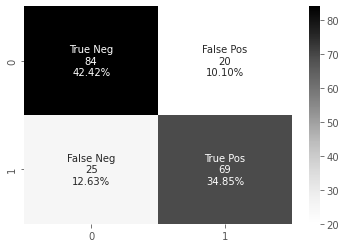

In [78]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_dtc.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_dtc.flatten()/np.sum(cf_matrix_dtc)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_dtc, annot=labels, fmt='', cmap='Greys')

Si bien, el porcentaje de clasificaciones correctas demuestra un alto porcentaje, el recall posee valores cercanos a los obtenidos en Naive Bayes que considera el uso de todas las variables, por lo cual, no se observa una mejora significativa.

Profundidad del árbol: 2
Número de nodos terminales: 4


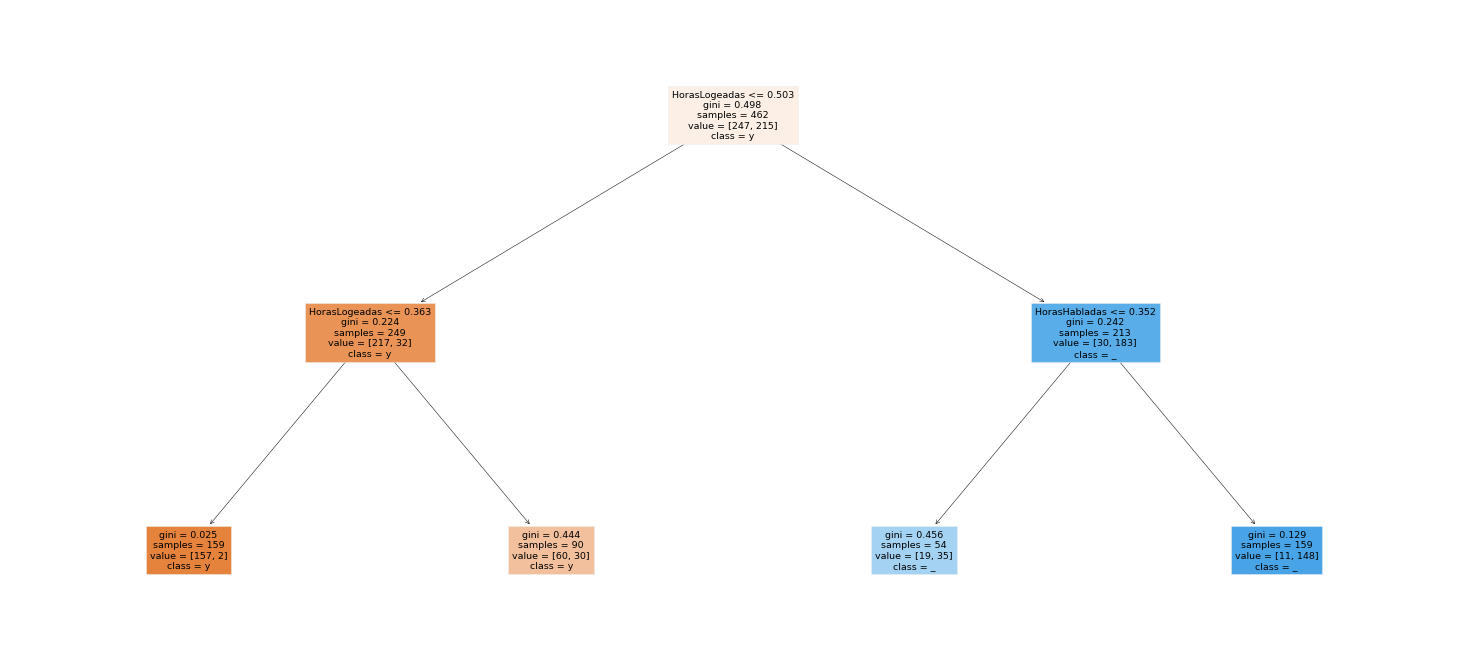

In [65]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(26, 12))

print(f"Profundidad del árbol: {modelo_dtc.get_depth()}")
print(f"Número de nodos terminales: {modelo_dtc.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo_dtc,
            feature_names = X.columns.tolist(),
            class_names   = 'y_n',
            filled        = True,
            impurity      = True,
            fontsize      = 9.5,
            ax            = ax
       )

En base al análisis del gráfico, se puede determinar que las variables más incidentes en la predicción son: `HorasLogeadas` y `HorasHabladas`.

## Pregunta 5
Entrene un clasificador naive Bayes usando los atributos que aparecen en el árbol de decisión.  Luego evalúe en el conjunto de prueba generando el classification report. Mejora el desempeño al comparar los resultados de las preguntas 1, 2, y 3? argumente en función de las métricas de desempeño.

### Respuesta

In [66]:
X_train.info() #objeto identificar las variables que muestra el árbol de decisión.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        462 non-null    float64
 1   HorasLogeadas               462 non-null    float64
 2   HorasHabladas               462 non-null    float64
 3   ContactosEfectivosPromedio  462 non-null    float64
 4   RegistrosTerminados         462 non-null    float64
 5   Sexo_f                      462 non-null    float64
 6   Sexo_m                      462 non-null    float64
 7   NivelEducacion_em           462 non-null    float64
 8   NivelEducacion_sec          462 non-null    float64
 9   NivelEducacion_ts           462 non-null    float64
 10  NivelEducacion_un           462 non-null    float64
 11  EstadoCivil_c               462 non-null    float64
 12  EstadoCivil_s               462 non-null    float64
 13  NivelSocEco_abc1            462 non

De acuerdo a lo obtenido en el árbol de decisión (DecisionTreeClasiffier), aquellos que son operacionales (2), los cuales corresponden a:

- `HorasLogeadas`.
- `HorasHabladas`.

In [67]:
X_train3 = X_train.iloc[:,[1,2]].copy()
X_test3 = X_test.iloc[:,[1,2]].copy()

In [68]:
from sklearn.naive_bayes import GaussianNB
model_NB_DTC = GaussianNB()
score = []
model_NB_DTC.fit(X_train3,y_train)

GaussianNB()

In [69]:
predicciones_NB_DTC = model_NB_DTC.predict(X_test3)
accuracy_NB_DTC = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones_NB_DTC,
            normalize = True
           )
print(f"El porcentaje de clasificaciones correctas para el NB con variables de dtc es: {round(100 * accuracy_operacionales,2)} %")
score.append(round(100 * accuracy_NB_DTC,2))

El porcentaje de clasificaciones correctas para el NB con variables de dtc es: 77.78 %


Al utilizar sólo las variables indicadas por el DecisionTreClassifier, podemos observar un aumento en el porcentaje de clasificaciones correctas.

In [70]:
print(classification_report(y_test, predicciones_NB_DTC))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       104
           1       0.76      0.81      0.78        94

    accuracy                           0.79       198
   macro avg       0.79      0.79      0.79       198
weighted avg       0.79      0.79      0.79       198



Del análisis de lo anterior, se puede observar que los niveles de recall se han optimizado.

In [71]:
from sklearn.metrics import confusion_matrix
cf_matrix_4 = confusion_matrix(
            y_true    = y_test,
            y_pred    = predicciones_NB_DTC)
print(cf_matrix_4)

[[80 24]
 [18 76]]


<AxesSubplot:>

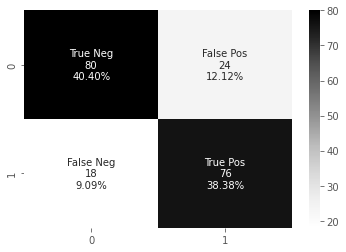

In [72]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_4.flatten()/np.sum(cf_matrix_4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_4, annot=labels, fmt='', cmap='Greys')

Por último, cabe destacar que los valores de **False Negative (18 - 9.09%)** y **False Positive (24 - 12.12%)**, se encuentran en sus valores más bajos, lo que demuestra que el modelo es un mejor modelo que los anteriores.

## Tabla Resumen de Métricas Obtenidas en los modelos:

| Nº de modelo | Descripción  | Accuracy| TN       | TP       |FP        | FN       | Recall (yes)|
|:---:|:-----------------------|:-------:|----------|----------|----------|----------|:-------------:|
| 1 | `GaussianNB - SocioDemografico` | 55.56%  |85(42.93%)|25(12.63%)|69(34.85%)|19(09.60%)| 27%         |
| 2 | `GaussianNB - Operacionales` | **77.78%**  |**78(39.39%)**|76(38.38%)|18(09.09%)|**26(13.13%)**| 81%         |
| 3 | `GaussianNB - Completo` | 74.24%  |79(39.90%)|68(34.34%)|26(13.13%)|25(12.63%)| 72%         |
| 4 | `DecisionTreeClassifier`| 77.00%  |84(42.42%)|69(34.85%)|25(12.63%)|20(10.10%)| 73%         |
| 5 | `GaussianNB - VariablesDTC`   | **77.78%**  |**80(40.40%)**|76(38.38%)|18(09.09%)|**24(12.12%)**| 81%         |

Prelimnarmente se puede observar que el uso de las variables operacionales y el modelo número 5, tienen métricas similares pero este último tiene menores tasas de Falsos Negativos y mayor tasa de Verdaderos negativos, por lo cual representa el mejor modelo.


## Suerte!